In [1]:
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: Read the CSV file
df = pd.read_csv("your_file.csv")

# Step 2: Identify output and feature columns
output_column = "output_column_name"  # Replace with the name of your output column
feature_columns = [col for col in df.columns if col != output_column]

# Step 3: Plot the distribution of all columns
df[feature_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Step 4: Create design of experiments only on feature columns
total_points = len(df)
lhs_points = lhs(len(feature_columns), samples=int(total_points * 0.1))
random_points = np.random.rand(int(total_points * 0.1), len(feature_columns))
ccd_points = ccdesign(len(feature_columns), center=(2**0.5), alpha='face', face='cci')

# Combine points from different methods
design_points = np.vstack((lhs_points, random_points, ccd_points))

# Optionally, you may want to scale the design points to match the ranges of your original data
# Example: design_points = design_points * (df[feature_columns].max() - df[feature_columns].min()) + df[feature_columns].min()

# Calculate the Euclidean distances between each design point and all points in the feature space
distances = euclidean_distances(df[feature_columns], design_points)

# Find the index of the closest point in the feature space for each design point
closest_indices = np.argmin(distances, axis=0)

# Get the actual feature values of the closest points
closest_points = df.iloc[closest_indices]

print("Closest points in the feature space:")
print(closest_points)


NameError: name 'pd' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv("your_file.csv")

# Step 2: Identify output and feature columns
output_column = "output_column_name"  # Replace with the name of your output column
feature_columns = [col for col in df.columns if col != output_column]

# Step 3: Scale the features
scaler = MinMaxScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Step 4: Create polynomial features with interaction terms only
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(df[feature_columns])

# Step 5: Manually add squared terms of individual features
X_squared = df[feature_columns] ** 2

# Step 6: Concatenate interaction terms and squared terms
X_poly = np.hstack((X_interaction, X_squared))

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, df[output_column], test_size=0.2, random_state=42)

# Step 8: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Evaluate the model
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Sample feature names (replace this with your actual feature names)
feature_names = np.array(['X1', 'X2', 'X3'])

# Reshape the feature names array to have two dimensions
feature_names = feature_names.reshape(1, -1)

# Create PolynomialFeatures object with interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Get interaction feature names
interaction_feature_names = poly.fit(feature_names).get_feature_names(feature_names)

# Extract and print interaction terms in order
print("Interaction terms:")
for i, interaction_term in enumerate(interaction_feature_names):
    print(f"{i+1}: {interaction_term}")


/Users/vayu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

/Users/vayu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  # This is added back by InteractiveShellApp.init_path()
/Users/vayu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  if sys.path[0] == "":


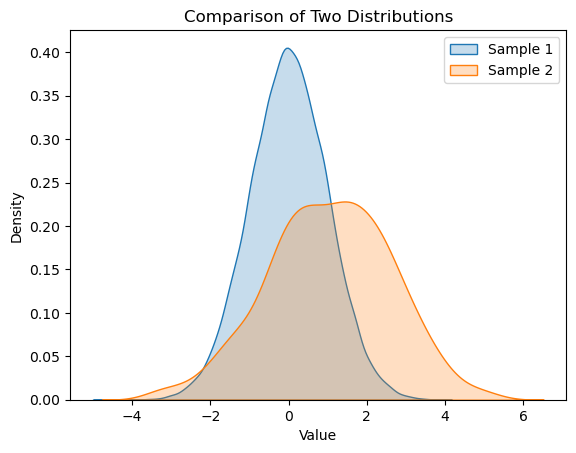

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate example data (replace this with your actual data)
np.random.seed(0)
sample1 = np.random.normal(loc=0, scale=1, size=50000)
sample2 = np.random.normal(loc=1, scale=1.5, size=500)

# Create KDE plots for each sample
sns.kdeplot(sample1, label='Sample 1', shade=True)
sns.kdeplot(sample2, label='Sample 2', shade=True)

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Two Distributions')
plt.legend()

# Show plot
plt.show()


In [4]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


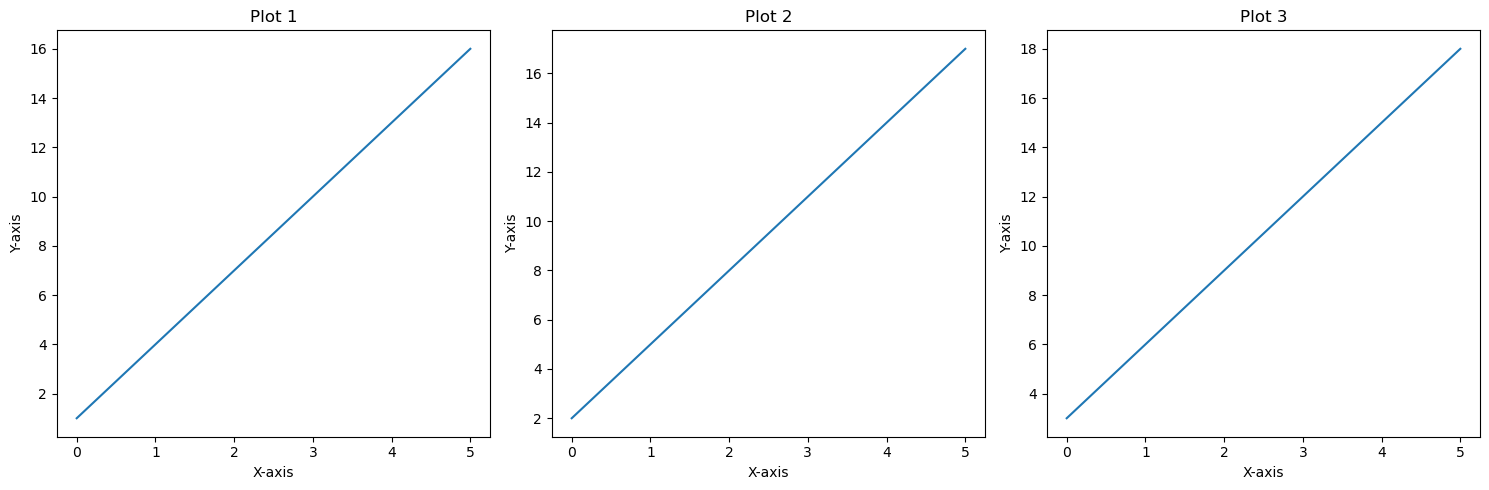

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]]

# Create a DataFrame with the data
df = pd.DataFrame(data, columns=['A', 'B', 'C'])

# Set the x-axis values (assuming they are the same for all columns)
x_values = range(len(df))

# Calculate the number of rows needed based on the number of columns
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Adjust according to your preference

# Plot the data in a for loop
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows*5))
for i, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    if i < num_cols:
        ax.plot(x_values, df[col])
        ax.set_title(f'Plot {i+1}')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
    else:
        ax.axis('off')  # Remove axis if there are no more columns to plot

# Adjust layout
plt.tight_layout()
plt.show()


In [67]:
def calculate_mortgage(principal, annual_interest_rate, years):
    monthly_interest_rate = annual_interest_rate / 12 / 100
    total_payments = years * 12
    monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / ((1 + monthly_interest_rate) ** total_payments - 1)
    
    return monthly_payment

def calculate_principal_and_interest(principal, annual_interest_rate, years):
    monthly_payment = calculate_mortgage(principal, annual_interest_rate, years)
    monthly_interest = []
    monthly_principal = []
    remaining_principal = principal
    
    for i in range(years * 12):
        interest_this_month = remaining_principal * (annual_interest_rate / 12 / 100)
        principal_this_month = monthly_payment - interest_this_month
        remaining_principal -= principal_this_month
        monthly_interest.append(interest_this_month)
        monthly_principal.append(principal_this_month)
    
    return monthly_principal, monthly_interest

principal = 940000
annual_interest_rate = 7.99
years = 30

monthly_principal, monthly_interest = calculate_principal_and_interest(principal, annual_interest_rate, years)

print("\nMonthly Principal and Interest Payments for a 30-year Mortgage:")
print("Month\tPrincipal\tInterest\tTotal")
for i in range(len(monthly_principal)):
    print(f"{i+1}\t{monthly_principal[i]:.2f}\t\t{monthly_interest[i]:.2f}\t\t{monthly_principal[i]+monthly_interest[i]:.2f}")

cost_of_loan = 0
for i in range(12):
    cost_of_loan += monthly_interest[i]

print(cost_of_loan)
    


Monthly Principal and Interest Payments for a 30-year Mortgage:
Month	Principal	Interest	Total
1	632.00		6258.83		6890.84
2	636.21		6254.63		6890.84
3	640.45		6250.39		6890.84
4	644.71		6246.12		6890.84
5	649.00		6241.83		6890.84
6	653.32		6237.51		6890.84
7	657.67		6233.16		6890.84
8	662.05		6228.78		6890.84
9	666.46		6224.37		6890.84
10	670.90		6219.94		6890.84
11	675.37		6215.47		6890.84
12	679.86		6210.97		6890.84
13	684.39		6206.45		6890.84
14	688.95		6201.89		6890.84
15	693.53		6197.30		6890.84
16	698.15		6192.68		6890.84
17	702.80		6188.04		6890.84
18	707.48		6183.36		6890.84
19	712.19		6178.64		6890.84
20	716.93		6173.90		6890.84
21	721.71		6169.13		6890.84
22	726.51		6164.32		6890.84
23	731.35		6159.49		6890.84
24	736.22		6154.62		6890.84
25	741.12		6149.72		6890.84
26	746.05		6144.78		6890.84
27	751.02		6139.81		6890.84
28	756.02		6134.81		6890.84
29	761.06		6129.78		6890.84
30	766.12		6124.71		6890.84
31	771.23		6119.61		6890.84
32	776.36		6114.48		6890.84
33	781.53		6109.3

In [75]:
(56157+10000-28000)*0.30

11447.1

In [76]:
def calculate_mortgage(principal, annual_interest_rate, num_months):
    monthly_interest_rate = annual_interest_rate / 12 / 100
    total_payments = num_months
    monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / ((1 + monthly_interest_rate) ** total_payments - 1)
    return monthly_payment

def calculate_principal_and_interest(principal, annual_interest_rate, years, additional_principal):

    monthly_interest = []
    monthly_principal = []
    remaining_principal = principal
    
    for i in range(years * 12):


        monthly_payment = calculate_mortgage(remaining_principal, annual_interest_rate, (years*12)-i)
        
        print(monthly_payment)

   
        interest_this_month = remaining_principal * (annual_interest_rate/12/100)
        principal_this_month = monthly_payment - interest_this_month

        monthly_interest.append(interest_this_month)
        monthly_principal.append(principal_this_month+additional_principal)
        
        remaining_principal -= additional_principal
    
    return monthly_principal, monthly_interest

principal = 967000
annual_interest_rate = 7.625
years = 30
additional_principal = 0

monthly_principal, monthly_interest = calculate_principal_and_interest(principal, annual_interest_rate, years, additional_principal)

print("\nMonthly Principal and Interest Payments for a 30-year Mortgage:")
print("Month\tPrincipal\tInterest\tTotal")
for i in range(len(monthly_principal)):
    print(f"{i+1}\t{monthly_principal[i]:.2f}\t\t{monthly_interest[i]:.2f}\t\t{monthly_principal[i]+monthly_interest[i]:.2f}")

6844.36552724932
6849.322867118941
6854.318961783991
6859.354166081704
6864.428838845049
6869.543342958573
6874.698045415196
6879.893317373957
6885.129534218752
6890.407075618071
6895.726325585749
6901.087672542781
6906.491509380173
6911.9382335229
6917.428246994962
6922.961956485566
6928.539773416465
6934.162114010481
6939.829399361205
6945.542055503951
6951.300513487933
6957.105209449738
6962.956584688089
6968.855085739942
6974.801164457939
6980.795278089247
6986.83788935581
6992.929466536044
6999.070483548012
7005.261420034099
7011.502761447221
7017.794999138624
7024.138630447258
7030.534158790807
7036.9820937584
7043.482951205009
7050.037253347611
7056.645528863126
7063.308312988184
7070.026147620748
7076.7995814236465
7083.629169930052
7090.515475650937
7097.459068184579
7104.460524328129
7111.520428191307
7118.639371312271
7125.817952775708
7133.056779333183
7140.356465525817
7147.7176338093395
7155.140914681557
7162.6269468123155
7170.1763771759925
7177.789861186583
7185.4680628

In [79]:
import sympy as sp

# Define symbols
x, x_hat = sp.symbols('x x_hat')

# Define linear transformation: x = a*x_hat + b
a = 2  # Example slope
b = 1  # Example intercept

# Express x in terms of x_hat
x_expr = a * x_hat + b

# Define polynomial function in terms of x
polynomial_in_x = 2*x**2 + 3*x + 1  # Example polynomial function

# Substitute x in terms of x_hat in the polynomial function
polynomial_in_x_hat = polynomial_in_x.subs(x, x_expr)

# Print the polynomial function in terms of x_hat
print("Polynomial function in terms of x_hat:")
print(polynomial_in_x_hat)


Polynomial function in terms of x_hat:
6*x_hat + 2*(2*x_hat + 1)**2 + 4


In [80]:
import sympy as sp

# Define symbols
x, x_hat = sp.symbols('x x_hat')

# Define linear transformation: x = a*x_hat + b
a = 2  # Example slope
b = 1  # Example intercept

# Express x in terms of x_hat
x_expr = a * x_hat + b

# Define polynomial function in terms of x
polynomial_in_x = 2*x**2 + 3*x + 1  # Example polynomial function

# Substitute x in terms of x_hat in the polynomial function
polynomial_in_x_hat = polynomial_in_x.subs(x, x_expr)

# Simplify the resulting expression
simplified_expression = sp.simplify(polynomial_in_x_hat)

# Print the simplified expression
print("Simplified polynomial function in terms of x_hat:")
print(simplified_expression)

Simplified polynomial function in terms of x_hat:
8*x_hat**2 + 14*x_hat + 6


In [81]:
import sympy as sp
from sklearn.preprocessing import MinMaxScaler

# Define symbols
x, x_hat = sp.symbols('x x_hat')

# Generate some sample data for x
x_data = [1, 2, 3, 4, 5]  # Example data

# Reshape x_data to have a shape of (n_samples, n_features) as expected by MinMaxScaler
x_data_reshaped = [[val] for val in x_data]

# Create an instance of MinMaxScaler and fit it to x_data
scaler = MinMaxScaler()
scaler.fit(x_data_reshaped)

# Define inverse transformation function from MinMaxScaler
def inverse_transform_minmax(x_hat, scaler):
    return scaler.inverse_transform([[x_hat]])[0][0]

# Express x in terms of x_hat using the inverse transformation function
x_expr = inverse_transform_minmax(x_hat, scaler)

# Define polynomial function in terms of x
polynomial_in_x = 2*x**2 + 3*x + 1  # Example polynomial function

# Substitute x in terms of x_hat in the polynomial function
polynomial_in_x_hat = polynomial_in_x.subs(x, x_expr)

# Simplify the resulting expression
simplified_expression = sp.simplify(polynomial_in_x_hat)

# Print the simplified expression
print("Simplified polynomial function in terms of x_hat:")
print(simplified_expression)


TypeError: Cannot convert expression to float

In [82]:
import sympy as sp
from sklearn.preprocessing import MinMaxScaler

# Define symbols
x, x_hat = sp.symbols('x x_hat')

# Generate some sample data for x
x_data = [[1], [2], [3], [4], [5]]  # Example data

# Create an instance of MinMaxScaler and fit it to x_data
scaler = MinMaxScaler()
scaler.fit(x_data)

# Define inverse transformation function from MinMaxScaler
def inverse_transform_minmax(x_hat_val, scaler):
    return scaler.inverse_transform([[x_hat_val]])[0][0]

# Express x in terms of x_hat using the inverse transformation function
x_expr = inverse_transform_minmax(x_hat, scaler)

# Define polynomial function in terms of x
polynomial_in_x = 2*x**2 + 3*x + 1  # Example polynomial function

# Substitute x in terms of x_hat in the polynomial function
polynomial_in_x_hat = polynomial_in_x.subs(x, x_expr)

# Simplify the resulting expression
simplified_expression = sp.simplify(polynomial_in_x_hat)

# Print the simplified expression
print("Simplified polynomial function in terms of x_hat:")
print(simplified_expression)


TypeError: Cannot convert expression to float

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with time series data
# Columns: 'input_feature1', 'input_feature2', 'output_feature'

# Step 1: Compute the correlation coefficient over rolling windows
window_size = 10  # Adjust the window size as per your data
correlation = df['input_feature1'].rolling(window=window_size).corr(df['input_feature2'])

# Step 2: Define a threshold
threshold = 0.2  # Adjust as per your data

# Step 3: Identify short durations where correlation coefficient is below threshold
low_corr_durations = []
start = None
for idx, corr in enumerate(correlation):
    if corr < threshold:
        if start is None:
            start = idx
    elif start is not None:
        low_corr_durations.append((start, idx))
        start = None

# Step 4: Use corresponding data
for start, end in low_corr_durations:
    filtered_data = df.iloc[start:end]  # Filtered data within the duration
    # Perform further analysis with filtered_data
